In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pandas as pd
%matplotlib inline

In [2]:
graduate_admissions_data = pd.read_csv('C:\\Users\\qasim\\Downloads\\graduate-admissions\\Graduate Admissions.csv')

In [3]:
graduate_admissions_data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
graduate_admissions_data = graduate_admissions_data.drop(columns=['Serial No.'])

In [68]:
x_values = np.array(graduate_admissions_data.columns[:-1])
X_init = graduate_admissions_data[x_values]
X_init.head(10)
Y_init = graduate_admissions_data['Chance of Admit ']
Y_init.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_init, Y_init, test_size=0.3, random_state=64)

In [70]:
# Building our machine learning model using multivariate linear regression through least squares approximation.

In [116]:
def least_squares_runner(training_x, training_y):
    def validation_lookup(check):
        flag = np.shape(check)
        if(flag[0] < flag[1]):
            check = np.transpose(check)
        return check
    
    training_x = validation_lookup(training_x)
    training_y = validation_lookup(training_y)
    
#     b = output (training_Y)
#     A = input (training_x)
    column_of_ones = np.ones((1, len(training_x)))
    training_x = np.insert(training_x, obj=0, values=column_of_ones, axis=1)
#     Math...
    matrix_transpose = np.transpose(training_x)
    matrix_mult = np.matmul(matrix_transpose,training_x)
    matrix_mult_post_inverse = np.linalg.inv(matrix_mult)
    posterior = np.matmul(matrix_transpose,training_y)
    weights = np.matmul(matrix_mult_post_inverse,posterior)    
    return weights
#     output the optimal weights.

In [117]:
X_train = np.array(X_train)
Y_train = np.array(Y_train).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1,1)
X_test = np.array(X_test)
# Converting all pandas series into numpy arrays

In [118]:
weights = least_squares_runner(X_train, Y_train)

In [119]:
# Y = w[0][0]*X_train[0][0] + w[1][0]*X_train[0][1] + ... w[-1]
X_train[1][0]

327.0

In [180]:
line_of_best_fit = []
for i in range(len(X_train)):
    num_features = len(X_train[i])
    total_one_observation_set = 0
    for j in range(num_features):
        total_one_observation_set += weights[j+1][0]*X_train[i][j]
    total_one_observation_set += weights[0][0]
    line_of_best_fit.append(total_one_observation_set)

In [181]:
line_of_best_fit

[0.604292474968497,
 ... Truncated for demo ... 0.6493246062129621,
 0.6679530581942839,
 0.7805496744193747,
 0.6549579805660342,
 0.9083833052076984]

In [153]:
Y_test[110][0]

0.62

### Part 3, Use Scikit - learn

In [155]:
reg = linear_model.LinearRegression()

In [157]:
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
reg.coef_
reg.predict(X_test)

array([[0.52157715],
 ... Truncated for demo        [0.78364748],
       [0.63266257],
       [0.43780351],
       [0.67424806],
       [1.00062938],
       [0.78603951],
       [0.69620219],
       [0.91764367],
       [0.65885609],
       [0.84009815]])

In [159]:
weights

array([[-1.32001827],
       [ 0.00194336],
       [ 0.00197281],
       [ 0.00331131],
       [ 0.00338792],
       [ 0.01913672],
       [ 0.12993684],
       [ 0.01757556]])

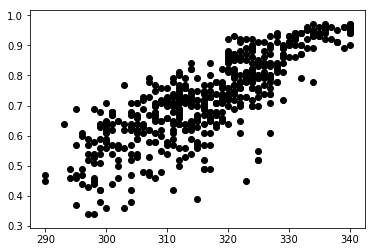

In [186]:
plt.scatter(X_init['GRE Score'], Y_init,c='0')

In [193]:
X_init.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1


In [194]:
337 110 3 4 2 8.24 1

SyntaxError: invalid syntax (<ipython-input-194-5176c0750da4>, line 1)

In [199]:
Y_predict = weights[1][0]*337 + weights[2][0]*110 + weights[3][0]*3 + weights[4][0]*4 + weights[5][0]*2 + weights[6][0]*8.24 + weights[7][0]*1 + weights[0][0]

In [200]:
print(Y_predict)

0.7019182957607009
